# ***Sprint - 1***

# Image preprocessing

Importing data set

In [ ]:
!unzip '/content/conversation engine for deaf and dumb.zip'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Import ImageDataGenerator Library And Configure It

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Training Datagen
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True)
# Testing Datagen
test_datagen = ImageDataGenerator(rescale=1./255)

Applying ImageDataGenerator Functionality To Train And Test Set

In [ ]:
# Training Dataset
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/training_set',target_size=(64,64),class_mode='categorical',batch_size=1000)

Found 15760 images belonging to 9 classes.


In [ ]:
# Testing Dataset
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/test_set',target_size=(64,64),class_mode='categorical',batch_size=900)

Found 2250 images belonging to 9 classes.


# ***Sprint - 2***

# Model Building

In [ ]:
# Import The Required Model Building Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [ ]:
# Initialize The Model
model=Sequential()

In [ ]:
# Add The Convolution Layer
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

In [ ]:
# Add The Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
# Add The Flatten Layer
model.add(Flatten())

In [ ]:
# Adding The Dense Layers
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(9,activation='softmax'))

In [ ]:
# Compile The Model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# Fit the Model
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
16/16 [==============================] - 4577s 287s/step - loss: 1.3900 - accuracy: 0.5605 - val_loss: 0.4479 - val_accuracy: 0.9040
Epoch 2/10
16/16 [==============================] - 40s 3s/step - loss: 0.2465 - accuracy: 0.9299 - val_loss: 0.2614 - val_accuracy: 0.9453
Epoch 3/10
16/16 [==============================] - 40s 3s/step - loss: 0.0950 - accuracy: 0.9723 - val_loss: 0.2297 - val_accuracy: 0.9604
Epoch 4/10
16/16 [==============================] - 40s 2s/step - loss: 0.0483 - accuracy: 0.9876 - val_loss: 0.2202 - val_accuracy: 0.9627
Epoch 5/10
16/16 [==============================] - 39s 2s/step - loss: 0.0279 - accuracy: 0.9934 - val_loss: 0.2470 - val_accuracy: 0.9729
Epoch 6/10
16/16 [==============================] - 39s 2s/step - loss: 0.0177 - accuracy: 0.9958 - val_loss: 0.2390 - val_accuracy: 0.9764
Epoch 7/10
16/16 [==============================] - 39s 2s/step - loss: 0.0120 - accuracy: 0.9971 - val_loss: 0.2383 - val_accuracy: 0.9751
Epoch 8/10
16/16

In [ ]:
# Save The Model
model.save('aslpng1.h5')

# Test the model

Import The Packages And Load The Saved Model

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
model=load_model('/content/drive/MyDrive/Model building/aslpng1.h5')

Load The Test Image, Pre-Process It And Predict

**Test_1**

(64, 64, 3)


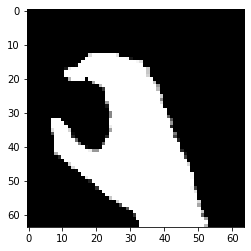

In [ ]:
x = cv2.imread('/content/drive/MyDrive/Dataset/test_set/C/15.png',1)
img = cv2.resize(x,(64,64))
plt.imshow(img)
print(img.shape)

In [ ]:
img = image.load_img('/content/drive/MyDrive/Dataset/test_set/C/184.png',target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op = ['A','B','C','D','E','F','G','H','I']
print("THE PREDICTED LETTER IS",op[pred])

1/1 [==============================] - 0s 168ms/step
THE PREDICTED LETTER IS C


**Test_2**

(64, 64, 3)


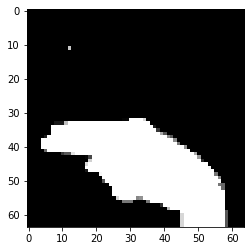

In [ ]:
x = cv2.imread('/content/drive/MyDrive/Dataset/test_set/H/65.png',1)
img = cv2.resize(x,(64,64))
plt.imshow(img)
print(img.shape)

In [ ]:
img = image.load_img('/content/drive/MyDrive/Dataset/test_set/H/50.png',target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op = ['A','B','C','D','E','F','G','H','I']
print("THE PREDICTED LETTER IS",op[pred])

1/1 [==============================] - 0s 18ms/step
THE PREDICTED LETTER IS H


In [ ]:
!tar -zcvf aslpng1-classification.tgz aslpng1.h5

aslpng1.h5


#Sprint-3


Sprint-3 did using spider in anaconda, Flask files are uploaded in github

# Sprint-4

# IBM Deployment and traing on IBM

In [ ]:
!pip install watson-machine-learning-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 6.2 MB/s 
     |████████████████████████████████| 132 kB 66.4 MB/s 
     |████████████████████████████████| 55 kB 3.8 MB/s 
     |████████████████████████████████| 79 kB 9.3 MB/s 
     |████████████████████████████████| 9.9 MB 66.7 MB/s 
     |████████████████████████████████| 140 kB 69.0 MB/s 
     |████████████████████████████████| 956 kB 65.8 MB/s 
     |████████████████████████████████| 135 kB 63.5 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.12.0-py3-none-any.whl size=73931 sha256=e2492540e220196944e1cf4df8e797586f9257794ec1559455774a6e7a63ad08
  Stored in directory: /root/.cache/pip/wheels/ec/94/29/2b57327cf00664b6614304f7958abd29d77ea0e5bbece2ea57
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.12.0-py3-none-any.whl size=562962 sha256=9ec97846ec6

In [ ]:
!pip install ibm_watson_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 8.2 MB/s 
     |████████████████████████████████| 51 kB 775 kB/s 
     |████████████████████████████████| 824 kB 43.4 MB/s 
     |████████████████████████████████| 133 kB 69.3 MB/s 
     |████████████████████████████████| 547 kB 65.0 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72563 sha256=0eb0925b0912d508e2a8599c45b56f50a5f25777a289849d0b835c97d7770ed9
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=7d50e8aa9e1f003a98c637f3dc0be6af34e200c0fc72ba5aaf38da9fe0f23ccc
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos_

In [ ]:
from ibm_watson_machine_learning import APIClient

wml_credentials = {
    "url":"https://eu-gb.ml.cloud.ibm.com",
    "apikey":"Tb1uOF5jhUT8RJSY4VYv2Sc6Elm-vgmArYsFeuOyduyC"
}

client = APIClient(wml_credentials)

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [ ]:
client

In [ ]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:eu-gb:a/7c2ed7a9983b408aa032b6d424b14ed5:70d12f1c-95a0-48c1-b877-b54ee7e54be1::',
      'guid': '70d12f1c-95a0-48c1-b877-b54ee7e54be1',
      'name': 'Watson Machine Learning-tm',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'Real-Time Communication System Powered by AI for Specially Abled',
    'scope': {'bss_account_id': '7c2ed7a9983b408aa032b6d424b14ed5'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': 'd8f2fdb5-bfa2-4a55-93fa-4d5568601d14',
      'bucket_region': 'eu-gb-standard',
      'credentials': {'admin': {'access_key_id': 'dc92e74303bf40ae8b7c49320a905b12',
        'api_key': 'h-vtSgOMYV4krNKp0-G0eVbCKlqLf90DFgZ0QwFhcDbe',
        'secret_access_key': 'b168fa5d629c38e02a4f774e32b0c0d78e749277c00c3c04',
        'service_id': 'ServiceId-a2a40a0f-aa3c-4490-a2b1-3b5390fe41ce'},
       'editor': {'access_key_id

In [ ]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ----------------------------------------------------------------  ------------------------
ID                                    NAME                                                              CREATED
59e8875a-1589-4a99-8437-abf4ecf3c880  Real-Time Communication System Powered by AI for Specially Abled  2022-11-19T12:08:11.589Z
------------------------------------  ----------------------------------------------------------------  ------------------------


In [ ]:
space_uid = "59e8875a-1589-4a99-8437-abf4ecf3c880"
space_uid

'59e8875a-1589-4a99-8437-abf4ecf3c880'

In [ ]:
client.set.default_space(space_uid)

'SUCCESS'

In [ ]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [ ]:
software_space_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [ ]:
model_details = client.repository.store_model(model="animal-classification.tgz", meta_props={
    client.repository.ModelMetaNames.NAME:"CNN B1 Model",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [ ]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-19T14:13:34.276Z',
  'id': '59d2fd73-7e18-4938-989a-9582fd5122bf',
  'modified_at': '2022-11-19T14:13:37.449Z',
  'name': 'CNN B1 Model',
  'owner': 'IBMid-668000DUB4',
  'resource_key': '14865dcf-c79f-414c-8cab-e5cec8927310',
  'space_id': '59e8875a-1589-4a99-8437-abf4ecf3c880'},
 'system': {'warnings': []}}

In [ ]:
model_id = client.repository.get_model_id(model_details)
model_id

'59d2fd73-7e18-4938-989a-9582fd5122bf'

In [ ]:
client.repository.download(model_id,'B2_IBM_Model.tgz')

Successfully saved model content to file: 'B2_IBM_Model.tgz'


'/content/B2_IBM_Model.tgz'